Text(0.5,0,u'month')

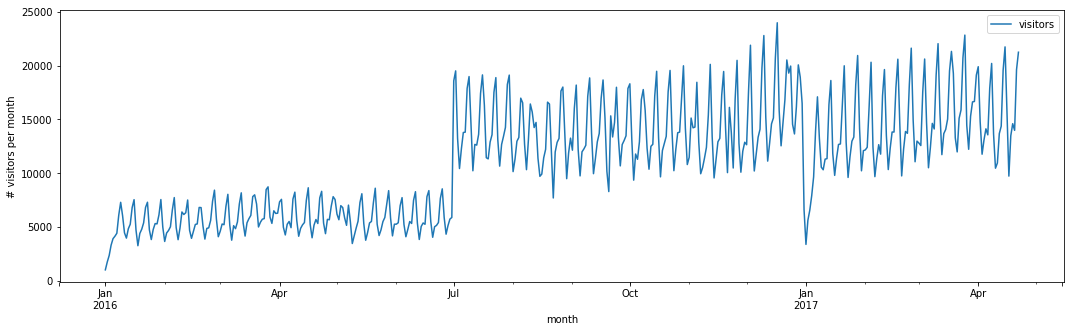

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

path="/Users/xing/Desktop/test/"
filename=path+"air_visit_data.csv"
air_visits = pd.read_csv(filename)
air_visits.visit_date = pd.to_datetime(air_visits.visit_date)
visitors_by_date = air_visits.groupby('visit_date').sum()
ax = visitors_by_date.plot(figsize=[18,5])
ax.set_ylabel('# visitors per month')
ax.set_xlabel('month')
#full = pd.read_csv(filename, parse_dates=['visit_date'])

Text(0,0.5,u'Avg #visitors')

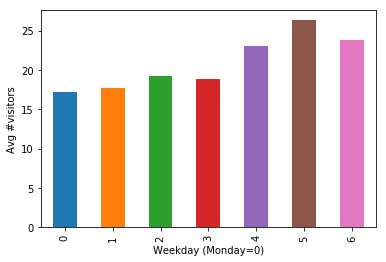

In [14]:
air_visits['weekday'] = air_visits.visit_date.dt.weekday
visitors_by_weekday = air_visits.groupby('weekday')['visitors'].mean()
ax = visitors_by_weekday.plot.bar()
ax.set_xlabel('Weekday (Monday=0)')
ax.set_ylabel('Avg #visitors')

Text(0.5,0,u'# day after booking come to visit')

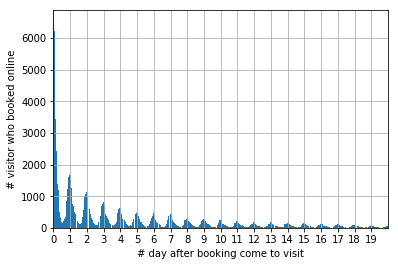

In [11]:
filename = path+"reserves.csv"
#reserves = pd.read_csv(filename, parse_dates=['visit_datetime', 'reserve_datetime'])
reserves = pd.read_csv(filename)
reserves.visit_datetime = pd.to_datetime(reserves.visit_datetime)
reserves.reserve_datetime = pd.to_datetime(reserves.reserve_datetime)
reserves['reserve_ahead'] = reserves.visit_datetime - reserves.reserve_datetime
reserves['day_ahead'] = reserves.reserve_ahead / pd.Timedelta('24 hour')
ax = reserves.day_ahead.hist(bins=10000)
ax.set_xlim([0,20])
ax.set_xticks(np.arange(0, 20, 1))
ax.set_ylabel('# visitor who booked online')
ax.set_xlabel('# day after booking come to visit')